## Credit Card Fraud Detection

Let us pridict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
# Importing all necessary Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import time

from sklearn import metrics
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from imblearn import over_sampling

## Exploratory data analysis

In [2]:
# Reading the csv data to dataframe
df = pd.read_csv(r'C:\Users\swathi.vemaraju\Downloads\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#observe the different feature type present in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# numerical description of data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Here we will observe the distribution of our classes

In [5]:
# Here we will observe the distribution of our classes
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print(classes)
print('Normal Transactions %ge=',normal_share)
print('Fraud Transactions %ge=',fraud_share)

0    284315
1       492
Name: Class, dtype: int64
Normal Transactions %ge= 99.82725143693798
Fraud Transactions %ge= 0.1727485630620034


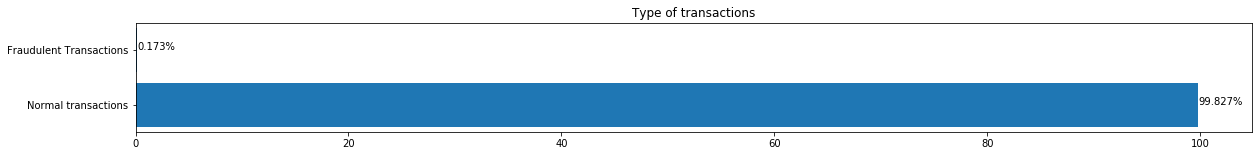

In [6]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(20,2))
plt.title('Type of transactions')
plt.barh(['Normal transactions','Fraudulent Transactions'],[normal_share,fraud_share])
for index, value in enumerate([normal_share,fraud_share]):
    plt.text(value, index, str(round(value,3))+'%')
plt.show()

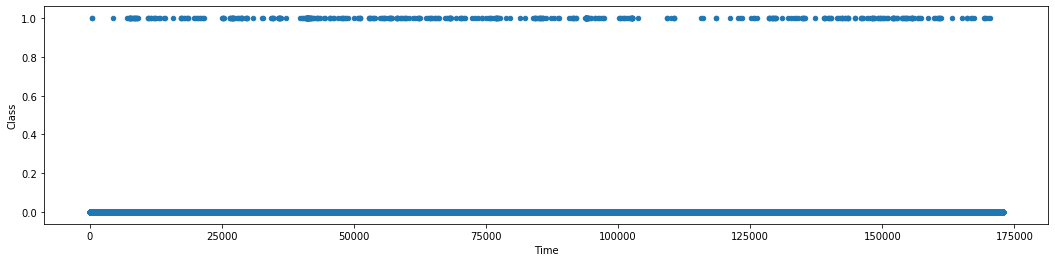

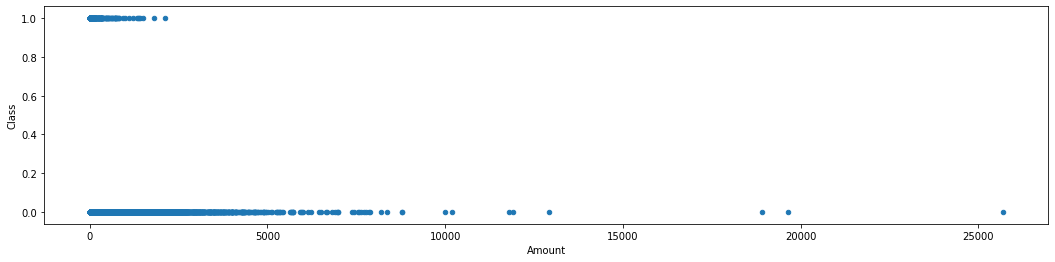

In [7]:
# Create a scatter plot to observe the distribution of classes with time
df.plot.scatter(y='Class', x='Time',figsize=(18,4))
plt.show()

# Create a scatter plot to observe the distribution of classes with Amount
df.plot.scatter(y='Class', x='Amount',figsize=(18,4))
plt.show()

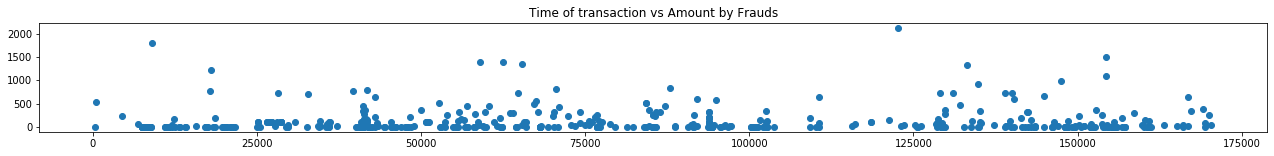

<function matplotlib.pyplot.show(*args, **kw)>

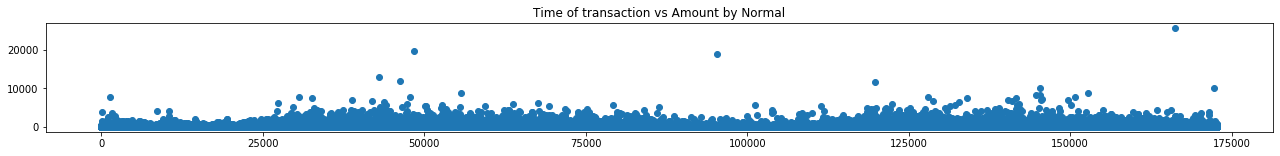

In [8]:
# Time of transacstion vs Amount Class wise
frauds = df[df.Class == 1]
normal = df[df.Class == 0]

plt.figure(figsize=(22,2))
plt.scatter(frauds.Time, frauds.Amount)
plt.title('Time of transaction vs Amount by Frauds')
plt.show()

plt.figure(figsize=(22,2))
plt.scatter(normal.Time, normal.Amount)
plt.title('Time of transaction vs Amount by Normal')
plt.show

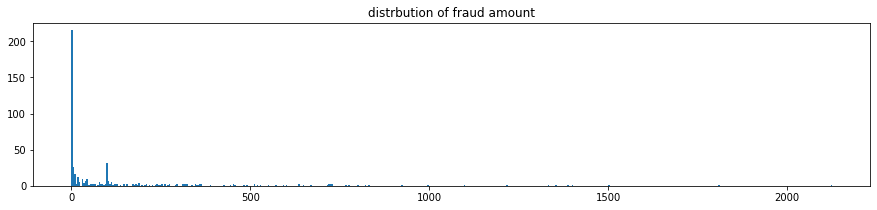

<function matplotlib.pyplot.show(*args, **kw)>

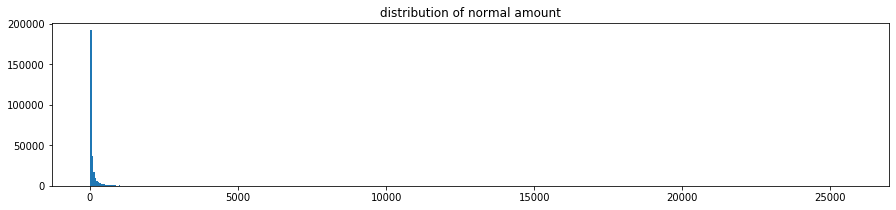

In [9]:
# Distribution of fraud and normal amount
bins = 500
plt.figure(figsize=(15,3))
plt.hist(frauds.Amount, bins=bins)
plt.title('distrbution of fraud amount')
plt.show()

plt.figure(figsize=(15,3))
plt.hist(normal.Amount, bins=bins)
plt.title('distribution of normal amount')
plt.show

In [10]:
# Drop unnecessary columns 'Time'
df1 = df.drop(columns=['Time'])
df1.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [11]:
# Checking the dataframe
df1.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Splitting the data into train & test data

In [12]:
# Seperating the Y
y= df1.pop("Class")
X= df1

In [13]:
# Train test split
from sklearn import model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(X,y,train_size = 0.7, stratify=y, random_state=47)

In [14]:
# Details of train and test data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(y_train.sum()/y_train.shape[0], y_test.sum()/y_test.shape[0])
print(y_test.shape[0]/y_train.shape[0])

(199364, 29) (85443, 29) (199364,) (85443,)
0.0017254870488152324 0.0017321489179921118
0.42857787765093


##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [15]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
344
148


### Plotting the distribution of a variable

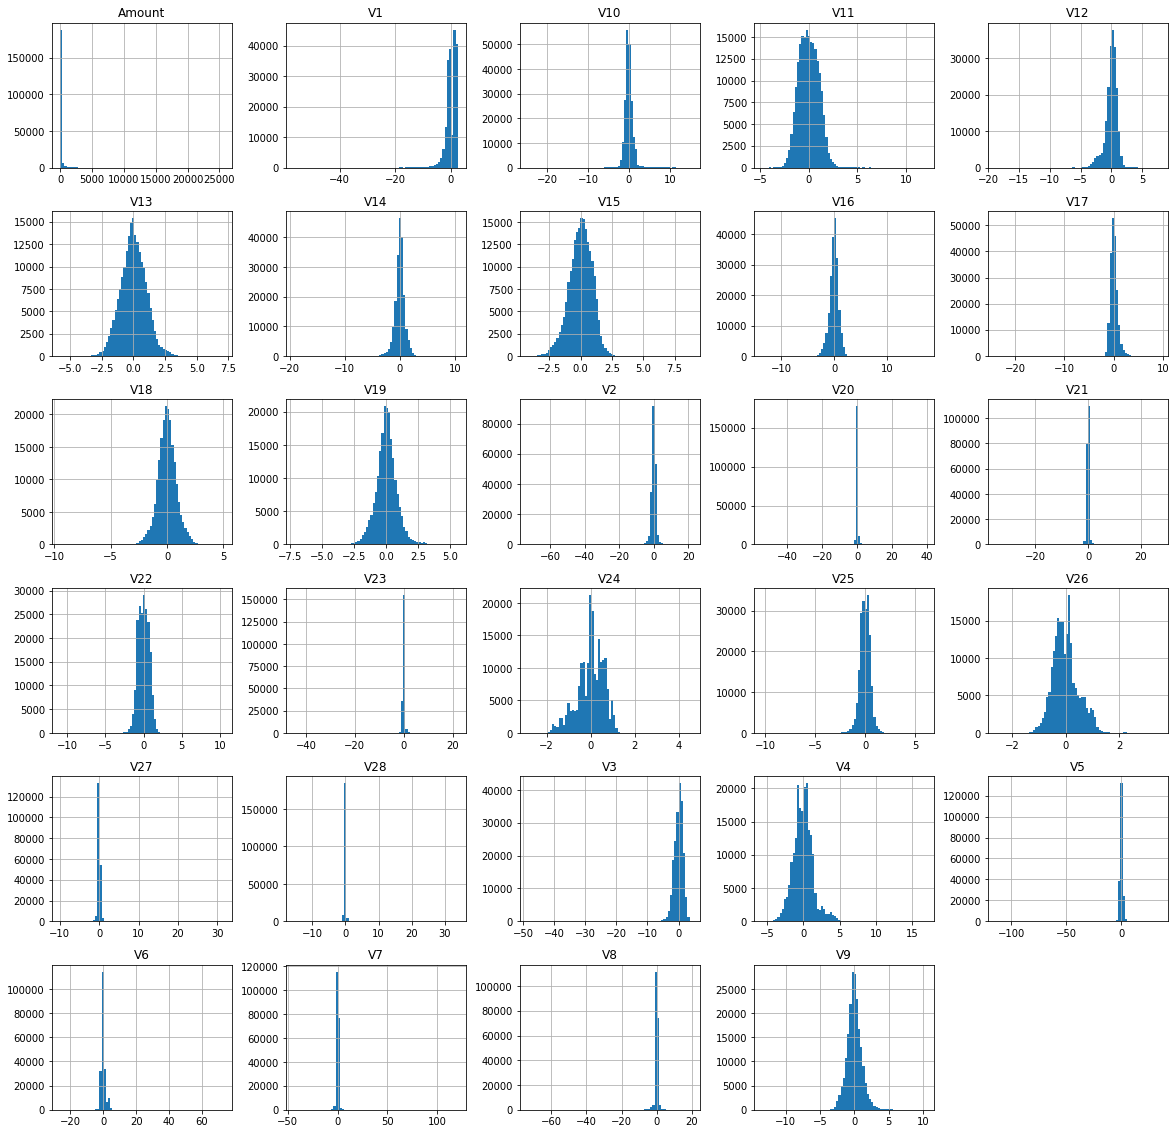

In [16]:
# plot the histogram of a variable from the dataset to see the skewness
X_train.hist(figsize=(20,20),bins=75)
plt.show()

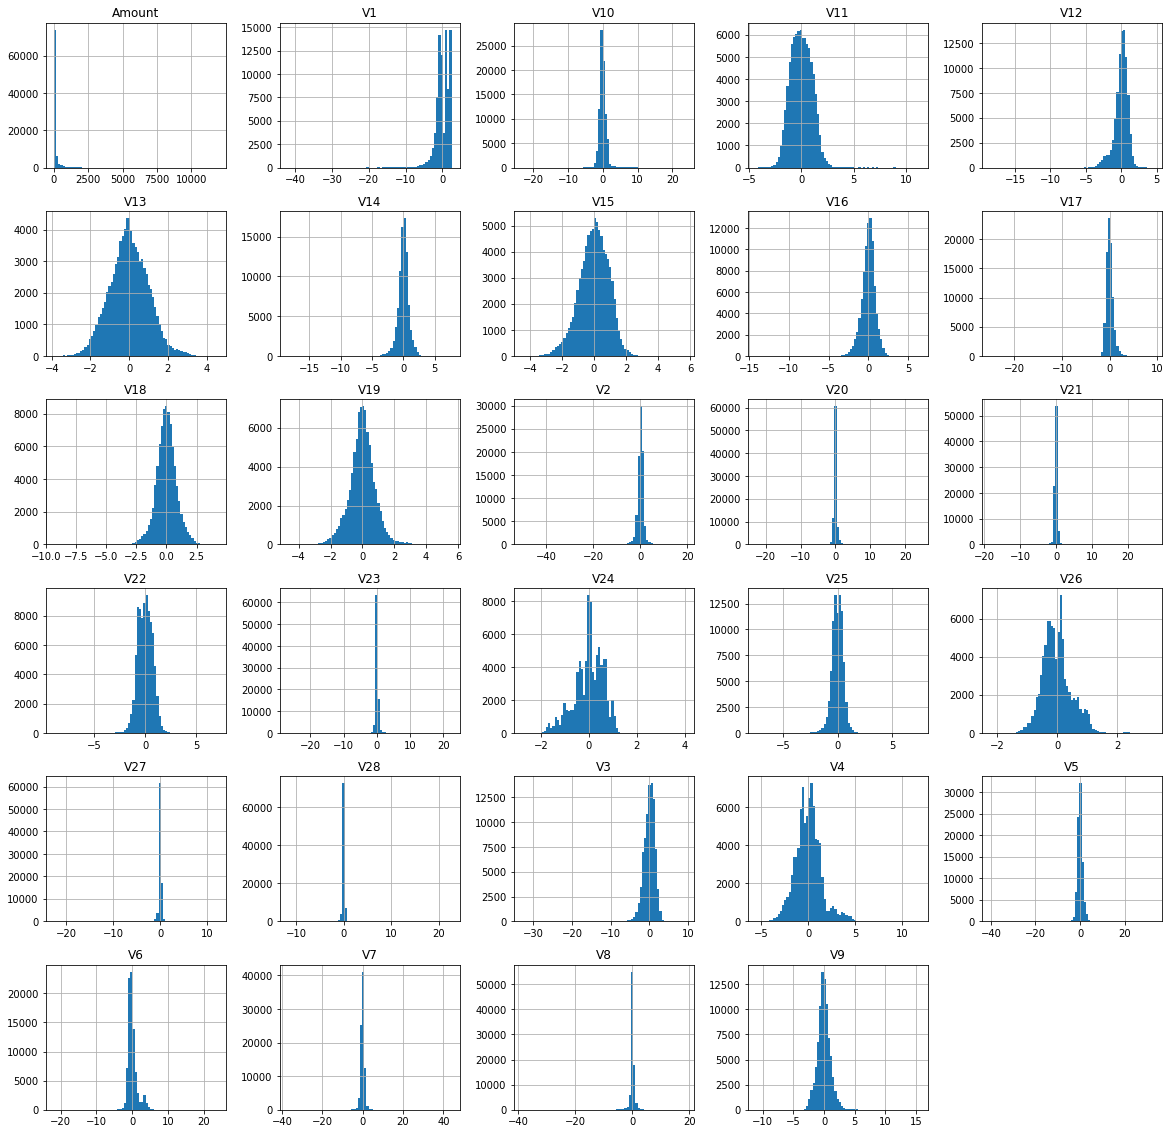

In [17]:
# distribution of variables in test dataset
X_test.hist(figsize=(20,20),bins=75)
plt.show()

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [18]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
pt.fit(X_train)                       ## Fit the PT on training data
X_train_pt = pt.transform(X_train)    ## Then apply on all data
X_test_pt = pt.transform(X_test)

In [19]:
# Converting to dataframes
X_train_ptd = pd.DataFrame(data=X_train_pt, columns=X_train.columns)
X_test_ptd = pd.DataFrame(data=X_test_pt, columns=X_test.columns)

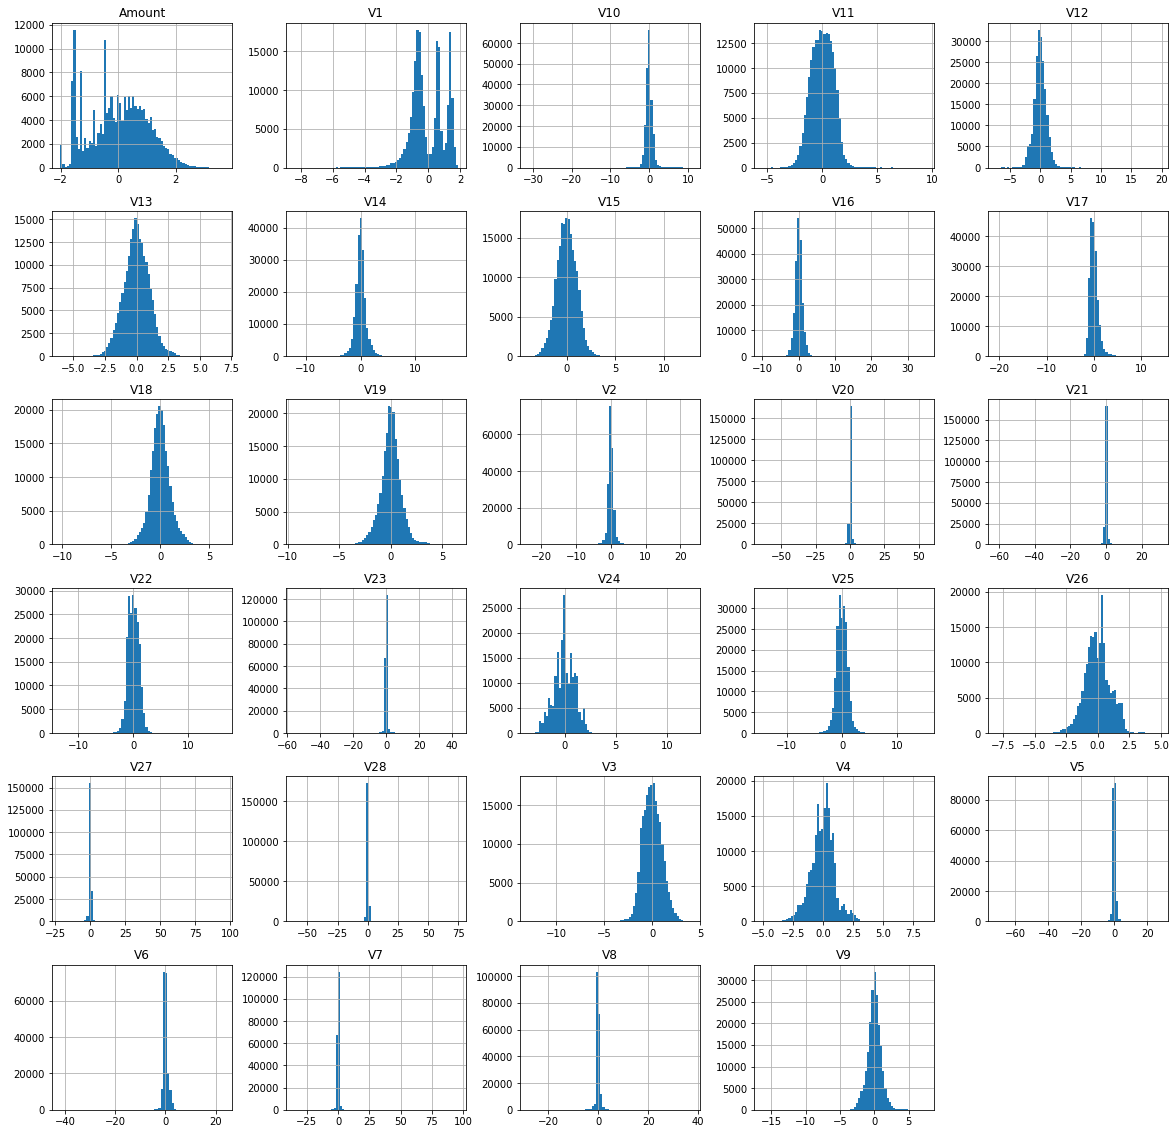

In [20]:
# plot the histogram of a variable from the dataset again to see the result 
X_train_ptd.hist(figsize=(20,20), bins=75)
plt.show()

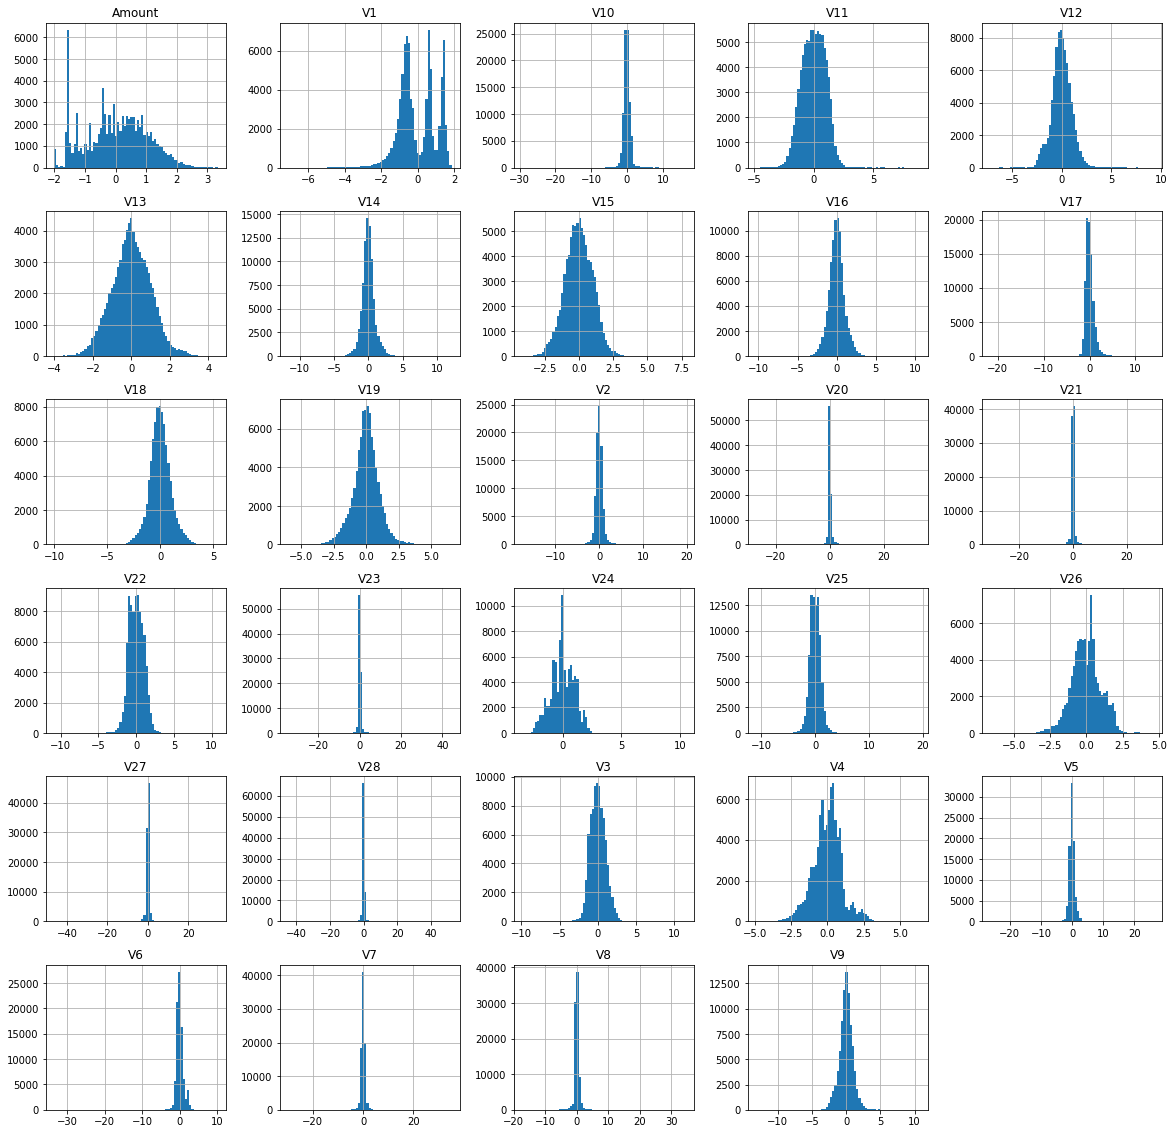

In [21]:
# Distribuion of test datasetd
X_test_ptd.hist(figsize=(20,20), bins=75)
plt.show()

## Model Building
- Build different models on the imbalanced dataset and see the result

### Function Cross Validating various models on Raw data

In [22]:
# Cross validating various models on the raw data set
def CrossValidation(X,y): 
  start_time = time.time()


  ##### Stratified Kfold Logistic Regression #####
  kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=45)
  pred_test_full =0
  cv_score =[]
  i=1
  for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    
    #model
    lr = LogisticRegression( max_iter=1000,random_state = 42)
    lr.fit(xtr,ytr)
    score = roc_auc_score(yvl,lr.predict(xvl))
    print('ROC AUC score:',score)
    cv_score.append(score)    
    i+=1
  print('******************************* LogisticReg ROC-AUC:',np.mean(cv_score))
  print((time.time()-start_time)/60,'mins')
  start_time = time.time()


  ##### Stratified Kfold Decision Tree Classifier #####
  kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=45)
  pred_test_full =0
  cv_score =[]
  i=1
  for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    
    #model
    dt = DecisionTreeClassifier(random_state = 42)
    dt.fit(xtr,ytr)
    score = roc_auc_score(yvl,dt.predict(xvl))
    print('ROC AUC score:',score)
    cv_score.append(score)    
    i+=1
  print('******************************* Decision Tree ROC-AUC:',np.mean(cv_score))

  print((time.time()-start_time)/60,'mins')
  start_time = time.time()


  ##### Stratified Kfold Random forest Classifier #####
  kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=45)
  pred_test_full =0
  cv_score =[]
  i=1
  for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    
    #model
    rf = RandomForestClassifier(random_state = 42)
    rf.fit(xtr,ytr)
    score = roc_auc_score(yvl,rf.predict(xvl))
    print('ROC AUC score:',score)
    cv_score.append(score)    
    i+=1
  print('******************************* Random Forest ROC-AUC:',np.mean(cv_score))
  
  print((time.time()-start_time)/60,'mins')
  start_time = time.time()  
  

  ##### Stratified Kfold XGBoost Classifier #####
  kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=45)
  pred_test_full =0
  cv_score =[]
  i=1
  for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    
    #model
    xgb = XGBClassifier(random_state = 42)
    xgb.fit(xtr,ytr)
    score = roc_auc_score(yvl,xgb.predict(xvl))
    print('ROC AUC score:',score)
    cv_score.append(score)    
    i+=1
  print('******************************* XGBoost ROC-AUC:',np.mean(cv_score)) 
  
  print((time.time()-start_time)/60,'mins')
  start_time = time.time()
  print('Complete')

  return(lr,dt,rf,xgb)


### Function for hyperparameter tuning using gridsearchCV

In [23]:
# Building all the models in a function that takes X_train, X_test, y_train, y_test

def ModelTuning(X_train,y_train,):

  nfolds = 5
  
  #### Tuned Logistic Regression Model ####
  # Creating the hyperparameter grid 
  C = np.array([0.01,0.1,1,10])
  penalty=['l1','l2']
  class_weight= ['balanced', None]
  max_iter = [1000,2000]
  logitParams = {'C': C, 'max_iter':max_iter,'penalty':penalty, 'class_weight':class_weight } 
  logreg = LogisticRegression(random_state=42)  
  # Instantiating the GridSearchCV object 
  tunedLogit = GridSearchCV(logreg, logitParams, cv = nfolds,scoring="roc_auc", verbose = 1,n_jobs=-1)  
  tunedLogit_results = tunedLogit.fit(X_train, y_train)
  print('tunedLogit') 
    

    
  #### Tuned Deicision tree classifier ####  
  DTparams = {'max_leaf_nodes': list(range(2,22,2)), 'min_samples_split': [2, 3, 4]}
  tunedDT = GridSearchCV(DecisionTreeClassifier(random_state=42), DTparams, verbose=1, cv=nfolds,scoring="roc_auc",n_jobs=-1)
  tunedDT_results = tunedDT.fit(X_train, y_train)
  print('tunedDT')    

  
  
  #### Tuned XGBoost Model ####
  XGBparams={'max_depth':[5,7],
             'min_child_weight': [5,7],
             'n_estimators': [150,200]}          

  xgb = XGBClassifier(learning_rate=0.2, objective= 'binary:logistic', random_state=42)
  tunedXGB = GridSearchCV(xgb, XGBparams, cv=nfolds, scoring="roc_auc",
                    n_jobs=-1, verbose=1)
  tunedXGB_results=tunedXGB.fit(X_train, y_train)
  print('tunedXGB')
  
  return([tunedLogit_results,
         tunedDT_results,
         tunedXGB_results])
          



### Function for various metric reports and tuned parameters

In [24]:
def MetricsReport(model_results):
  modelNames = ['tunedLogit_results',
                'tunedDT_results',
                'tunedXGB_results']
  for i in range(0,3):
    print('********* {} *********'.format(modelNames[i]))
    print('Confusion Matrix\n',metrics.confusion_matrix(y_test, model_results[i].predict(X_test)))
    print('accuracy_score  :',metrics.accuracy_score(y_test, model_results[i].predict(X_test)))
    print('precision_score :',metrics.precision_score(y_test, model_results[i].predict(X_test)))
    print('recall_score    :',metrics.recall_score(y_test, model_results[i].predict(X_test)))
    print('f1_score        :',metrics.f1_score(y_test, model_results[i].predict(X_test)))
    print('roc_auc_score   :',metrics.roc_auc_score(y_test.values.reshape(-1,1), 
                                                    model_results[i].predict_proba(X_test)[:,1]))
    print()
    print('Best Parameters',model_results[i].best_params_)
    print('Best Score',model_results[i].best_score_)
    print()

In [25]:
#Executing Cross validation
LR,DT,RF,XGB = CrossValidation(X,y)

1 of KFold 5
ROC AUC score: 0.8181202667336005
2 of KFold 5
ROC AUC score: 0.8029159931978989
3 of KFold 5
ROC AUC score: 0.821296675468105
4 of KFold 5
ROC AUC score: 0.7907811542744879
5 of KFold 5
ROC AUC score: 0.8264690607966803
******************************* LogisticReg ROC-AUC: 0.8119166300941545
1.7181790669759114 mins
1 of KFold 5
ROC AUC score: 0.9038821288878444
2 of KFold 5
ROC AUC score: 0.8735263402006275
3 of KFold 5
ROC AUC score: 0.8874737239918212
4 of KFold 5
ROC AUC score: 0.8722467391191217
5 of KFold 5
ROC AUC score: 0.9079874040255006
******************************* Decision Tree ROC-AUC: 0.889023267244983
1.1797174533208212 mins
1 of KFold 5
ROC AUC score: 0.898981105925868
2 of KFold 5
ROC AUC score: 0.8635836052521771
3 of KFold 5
ROC AUC score: 0.8775158481520389
4 of KFold 5
ROC AUC score: 0.9081280930499981
5 of KFold 5
ROC AUC score: 0.8877111367206608
******************************* Random Forest ROC-AUC: 0.8871839578201485
13.379826211929322 mins
1 of K

In [26]:
# Checking Logistic regression parameters
LR.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

In [27]:
# Cheking decision tree parameters
DT.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')>

In [28]:
# Checking XGBosst Parameters
XGB.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)>

In [29]:
# Executing Model tuning on Raw data
model_results = ModelTuning(X_train_ptd,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   18.7s finished


tunedLogit
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   56.8s finished


tunedDT
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  9.4min finished


tunedXGB


In [30]:
# Metric Reports and best parameters
MetricsReport(model_results)

********* tunedLogit_results *********
Confusion Matrix
 [[85264    31]
 [   61    87]]
accuracy_score  : 0.9989232587807076
precision_score : 0.7372881355932204
recall_score    : 0.5878378378378378
f1_score        : 0.6541353383458647
roc_auc_score   : 0.8407581477954887

Best Parameters {'C': 0.01, 'class_weight': None, 'max_iter': 1000, 'penalty': 'l2'}
Best Score 0.9814783166415693

********* tunedDT_results *********
Confusion Matrix
 [[85268    27]
 [   31   117]]
accuracy_score  : 0.9993211848834895
precision_score : 0.8125
recall_score    : 0.7905405405405406
f1_score        : 0.8013698630136987
roc_auc_score   : 0.9051317525978995

Best Parameters {'max_leaf_nodes': 10, 'min_samples_split': 2}
Best Score 0.9140983658802814

********* tunedXGB_results *********
Confusion Matrix
 [[85276    19]
 [   30   118]]
accuracy_score  : 0.9994265182636377
precision_score : 0.8613138686131386
recall_score    : 0.7972972972972973
f1_score        : 0.8280701754385965
roc_auc_score   : 0.969

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

In [31]:
# Selecting the best fitting classifier
clf = XGBClassifier(max_depth= 5, min_child_weight= 7, n_estimators= 200, random_state=42) 
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=7, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [32]:
#print the evaluation score on the X_test by choosing the best evaluation metric
y_pred= clf.predict_proba(X_test)[:,1]
score= metrics.roc_auc_score(y_test.values.reshape(-1,1),y_pred)
print("XGBOOST Classifier Test ROC-AUC Score =", score) 

XGBOOST Classifier Test ROC-AUC Score = 0.9795941905913181


Top var = 17
2nd Top var = 14
3rd Top var = 10


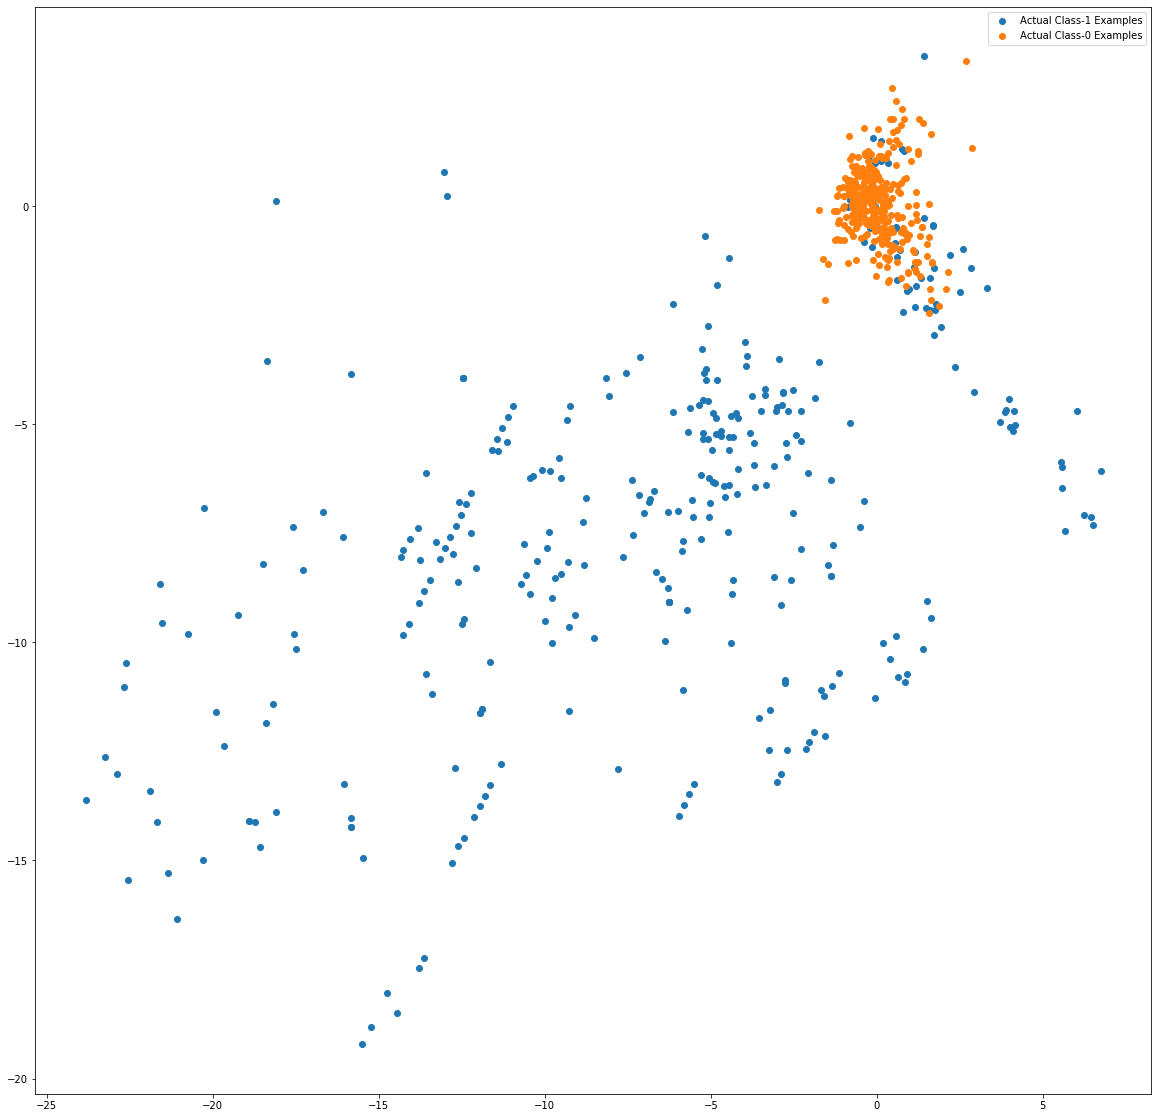

In [33]:
# Displaying important variables of model build on raw data
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

### Print the class distribution after applying SMOTE 

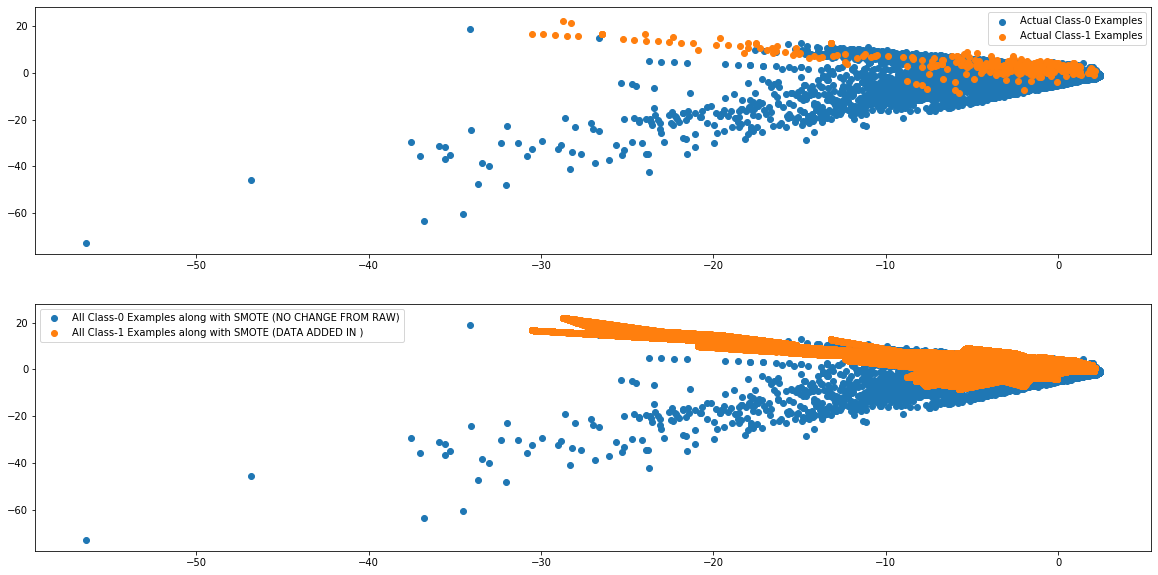

In [34]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do


X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

X_train_smote_1 = X_train_smote.to_numpy()[np.where(y_train_smote==1.0)]
X_train_smote_0 = X_train_smote.to_numpy()[np.where(y_train_smote==0.0)]

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]
fig = plt.figure()

plt.subplot(2, 1, 1)
plt.scatter(X_train_0[:, 0], X_train_0[:, 1], label='Actual Class-0 Examples')
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(2, 1, 2)
plt.scatter(X_train_smote_0[:, 0], X_train_smote_0[:, 1],label='All Class-0 Examples along with SMOTE (NO CHANGE FROM RAW)')
plt.scatter(X_train_smote_1[:, 0], X_train_smote_1[:, 1],label='All Class-1 Examples along with SMOTE (DATA ADDED IN )')
plt.legend()

##### Build models on other algorithms to see the better performing on SMOTE

In [35]:
def ModelTuning1(X_train,y_train,):

  nfolds = 5
  
  #### Tuned Logistic Regression Model ####
  # Creating the hyperparameter grid 
  C = np.array([0.01,0.1,1,10])
  penalty=['l1','l2']
  class_weight= ['balanced', None]
  max_iter = [1000,2000]
  logitParams = {'C': C, 'max_iter':max_iter,'penalty':penalty, 'class_weight':class_weight } 
  logreg = LogisticRegression(random_state=42)  
  # Instantiating the GridSearchCV object 
  tunedLogit = GridSearchCV(logreg, logitParams, cv = nfolds,scoring="roc_auc", verbose = 1,n_jobs=-1)  
  tunedLogit_results = tunedLogit.fit(X_train, y_train)
  print('tunedLogit') 
    

    
  #### Tuned Deicision tree classifier ####  
  DTparams = {'max_leaf_nodes': list(range(2,40,2)), 'min_samples_split': [2, 3, 4]}
  tunedDT = GridSearchCV(DecisionTreeClassifier(random_state=42), DTparams, verbose=1, cv=nfolds,scoring="roc_auc",n_jobs=-1)
  tunedDT_results = tunedDT.fit(X_train, y_train)
  print('tunedDT')    

  
  
  #### Tuned XGBoost Model ####
  XGBparams={'max_depth':[3,5],
             'min_child_weight': [1,3,5],
             'n_estimators': [100,200]}          

  xgb = XGBClassifier(learning_rate=0.2,subsample = 0.3, random_state=42)
  tunedXGB = GridSearchCV(xgb, XGBparams, cv=nfolds, scoring="roc_auc",
                    n_jobs=-1, verbose=1)
  tunedXGB_results=tunedXGB.fit(X_train, y_train)
  print('tunedXGB')
  
  return([tunedLogit_results,
         tunedDT_results,
         tunedXGB_results])

In [36]:
# Executing cross validation
LR_smote,DT_smote,RF_smote,XGB_smote = CrossValidation(X_train_smote, y_train_smote)

1 of KFold 5
ROC AUC score: 0.9675032660034167
2 of KFold 5
ROC AUC score: 0.9669505577328911
3 of KFold 5
ROC AUC score: 0.9667746960104513
4 of KFold 5
ROC AUC score: 0.9661843030851172
5 of KFold 5
ROC AUC score: 0.9671641041101398
******************************* LogisticReg ROC-AUC: 0.9669153853884032
1.867887282371521 mins
1 of KFold 5
ROC AUC score: 0.9984298060496432
2 of KFold 5
ROC AUC score: 0.998266505878806
3 of KFold 5
ROC AUC score: 0.9985302984624661
4 of KFold 5
ROC AUC score: 0.998442367601246
5 of KFold 5
ROC AUC score: 0.9983795598432319
******************************* Decision Tree ROC-AUC: 0.9984097075670787
1.6066147208213806 mins
1 of KFold 5
ROC AUC score: 0.9998869460355744
2 of KFold 5
ROC AUC score: 0.9998241382775601
3 of KFold 5
ROC AUC score: 0.9998995075871772
4 of KFold 5
ROC AUC score: 0.9999497537935885
5 of KFold 5
ROC AUC score: 0.9998618229323686
******************************* Random Forest ROC-AUC: 0.9998844337252537
14.173157926400503 mins
1 of K

In [37]:
# Checking Logistic regression parameters
LR_smote.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

In [38]:
# Checking decisio tree parameters
DT_smote.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')>

In [39]:
# Checking XGBoost parameters
XGB_smote.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)>

In [40]:
# Executing tuned models on SMOTE resampled data
model_smote_results = ModelTuning1(X_train_smote, y_train_smote)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  8.3min finished


tunedLogit
Fitting 5 folds for each of 57 candidates, totalling 285 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 285 out of 285 | elapsed:  5.1min finished


tunedDT
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 22.9min finished


tunedXGB


In [41]:
#Getting all important metrics of tuned models
MetricsReport(model_smote_results)

********* tunedLogit_results *********
Confusion Matrix
 [[84144  1151]
 [   21   127]]
accuracy_score  : 0.9862832531629273
precision_score : 0.09937402190923318
recall_score    : 0.8581081081081081
f1_score        : 0.17812061711079946
roc_auc_score   : 0.9650326054408943

Best Parameters {'C': 1.0, 'class_weight': 'balanced', 'max_iter': 1000, 'penalty': 'l2'}
Best Score 0.9934375552305583

********* tunedDT_results *********
Confusion Matrix
 [[84298   997]
 [   22   126]]
accuracy_score  : 0.9880739206254462
precision_score : 0.11219946571682991
recall_score    : 0.8513513513513513
f1_score        : 0.1982690794649882
roc_auc_score   : 0.9323758323655739

Best Parameters {'max_leaf_nodes': 38, 'min_samples_split': 2}
Best Score 0.9903846898869884

********* tunedXGB_results *********
Confusion Matrix
 [[85262    33]
 [   27   121]]
accuracy_score  : 0.9992977774656788
precision_score : 0.7857142857142857
recall_score    : 0.8175675675675675
f1_score        : 0.8013245033112583
roc

### Print the class distribution after applying ADASYN

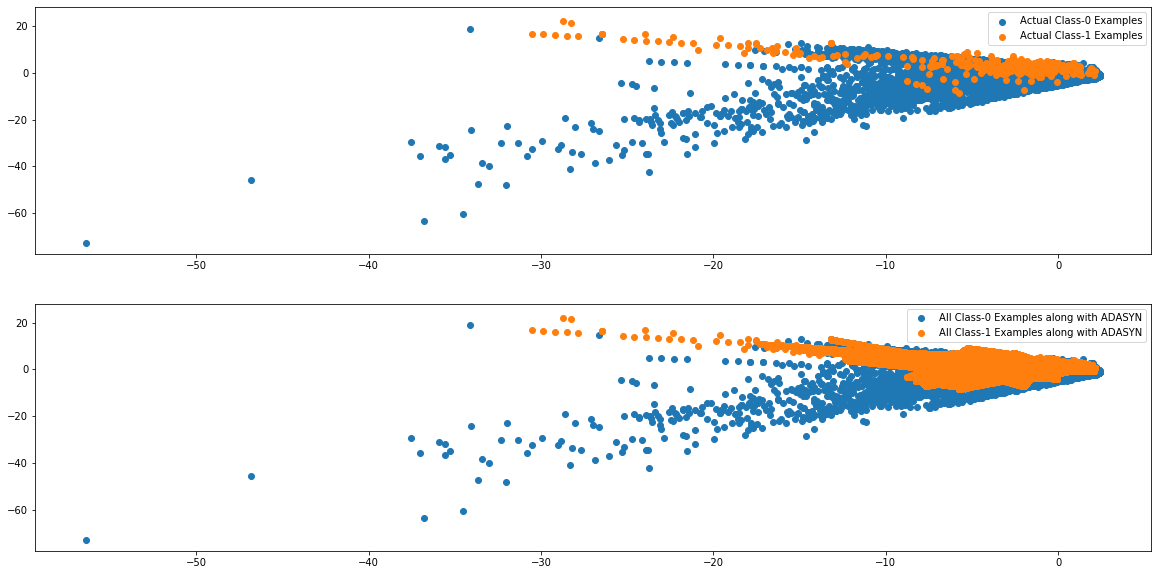

In [42]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do


X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

X_train_adasyn_1 = X_train_adasyn.to_numpy()[np.where(y_train_adasyn==1.0)]
X_train_adasyn_0 = X_train_adasyn.to_numpy()[np.where(y_train_adasyn==0.0)]

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]
fig = plt.figure()

plt.subplot(2, 1, 1)
plt.scatter(X_train_0[:, 0], X_train_0[:, 1], label='Actual Class-0 Examples')
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(2, 1, 2)
plt.scatter(X_train_adasyn_0[:, 0], X_train_adasyn_0[:, 1],label='All Class-0 Examples along with ADASYN')
plt.scatter(X_train_adasyn_1[:, 0], X_train_adasyn_1[:, 1],label='All Class-1 Examples along with ADASYN')
plt.legend()


##### Build models on other algorithms to see the better performing on ADASYN

In [43]:
def ModelTuning2(X_train,y_train,):

  nfolds = 5
  
  #### Tuned Logistic Regression Model ####
  # Creating the hyperparameter grid 
  C = np.array([0.01,0.1,1,10])
  penalty=['l1','l2']
  class_weight= ['balanced', None]
  max_iter = [1000,2000]
  logitParams = {'C': C, 'max_iter':max_iter,'penalty':penalty, 'class_weight':class_weight } 
  logreg = LogisticRegression(random_state=42)  
  # Instantiating the GridSearchCV object 
  tunedLogit = GridSearchCV(logreg, logitParams, cv = nfolds,scoring="roc_auc", verbose = 1,n_jobs=-1)  
  tunedLogit_results = tunedLogit.fit(X_train, y_train)
  print('tunedLogit') 
    

    
  #### Tuned Deicision tree classifier ####  
  DTparams = {'max_leaf_nodes': list(range(2,40,2)), 'min_samples_split': [2, 3, 4]}
  tunedDT = GridSearchCV(DecisionTreeClassifier(random_state=42), DTparams, verbose=1, cv=nfolds,scoring="roc_auc",n_jobs=-1)
  tunedDT_results = tunedDT.fit(X_train, y_train)
  print('tunedDT')    

  
  
  #### Tuned XGBoost Model ####
  XGBparams={'max_depth':[3,5],
             'min_child_weight': [1,3,5],
             'n_estimators': [100,200]}          

  xgb = XGBClassifier(learning_rate=0.2,subsample = 0.3, random_state=42)
  tunedXGB = GridSearchCV(xgb, XGBparams, cv=nfolds, scoring="roc_auc",
                    n_jobs=-1, verbose=1)
  tunedXGB_results=tunedXGB.fit(X_train, y_train)
  print('tunedXGB')
  
  return([tunedLogit_results,
         tunedDT_results,
         tunedXGB_results])

In [44]:
# Executing Cross validation of diffrent models
LR_adasyn,DT_adasyn,RF_adasyn,XGB_adasyn = CrossValidation(X_train_adasyn, y_train_adasyn)

1 of KFold 5
ROC AUC score: 0.9325432601179339
2 of KFold 5
ROC AUC score: 0.9323296985922173
3 of KFold 5
ROC AUC score: 0.9341260626432633
4 of KFold 5
ROC AUC score: 0.932543256962003
5 of KFold 5
ROC AUC score: 0.9329954715573334
******************************* LogisticReg ROC-AUC: 0.9329075499745502
2.017871848742167 mins
1 of KFold 5
ROC AUC score: 0.9987061522950789
2 of KFold 5
ROC AUC score: 0.9989825105330519
3 of KFold 5
ROC AUC score: 0.9985051677850264
4 of KFold 5
ROC AUC score: 0.9988443334654205
5 of KFold 5
ROC AUC score: 0.9990076311115129
******************************* Decision Tree ROC-AUC: 0.9988091590380181
1.552605354785919 mins
1 of KFold 5
ROC AUC score: 0.9998743844839715
2 of KFold 5
ROC AUC score: 0.9998115767259571
3 of KFold 5
ROC AUC score: 0.9998995075871772
4 of KFold 5
ROC AUC score: 0.9999497537935885
5 of KFold 5
ROC AUC score: 0.9998995075871772
******************************* Random Forest ROC-AUC: 0.9998869460355742
14.547216796875 mins
1 of KFol

In [45]:
# Checking Logistic regression parameters
LR_adasyn.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

In [46]:
# Checking Decision tree parameters
DT_adasyn.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')>

In [47]:
# Checking XGBoost parameters
XGB_adasyn.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)>

In [48]:
# Executing tuned models on ADASYN data
model_adasyn_results = ModelTuning2(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  8.1min finished


tunedLogit
Fitting 5 folds for each of 57 candidates, totalling 285 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 285 out of 285 | elapsed:  4.8min finished


tunedDT
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 20.3min finished


tunedXGB


In [49]:
# Metric results of tuned models built on ADASYN data
MetricsReport(model_adasyn_results)

********* tunedLogit_results *********
Confusion Matrix
 [[82069  3226]
 [   18   130]]
accuracy_score  : 0.9620331683110378
precision_score : 0.03873659117997616
recall_score    : 0.8783783783783784
f1_score        : 0.07420091324200913
roc_auc_score   : 0.9638159218483388

Best Parameters {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 1000, 'penalty': 'l2'}
Best Score 0.9770892953443383

********* tunedDT_results *********
Confusion Matrix
 [[82545  2750]
 [   17   131]]
accuracy_score  : 0.9676158374588907
precision_score : 0.04547032280458174
recall_score    : 0.8851351351351351
f1_score        : 0.08649719379333114
roc_auc_score   : 0.9308617310669013

Best Parameters {'max_leaf_nodes': 38, 'min_samples_split': 2}
Best Score 0.9788021053053184

********* tunedXGB_results *********
Confusion Matrix
 [[85266    29]
 [   27   121]]
accuracy_score  : 0.9993445923013002
precision_score : 0.8066666666666666
recall_score    : 0.8175675675675675
f1_score        : 0.8120805369127517
r

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [50]:
# perform the best oversampling method on X_train & y_train

clf = XGBClassifier(max_depth= 5, min_child_weight= 1,n_estimators= 200,
                    learning_rate=0.2,subsample = 0.3, random_state=42)

clf.fit(X_train_adasyn.values, y_train_adasyn.values ) # fit on the balanced dataset

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.3, verbosity=1)

In [51]:
#print the evaluation score on the X_test by choosing the best evaluation metric
y_pred= clf.predict_proba(X_test.values)[:,1]
score= metrics.roc_auc_score(y_test.values.reshape(-1,1),y_pred)
print("XGBOOST Classifier Test ROC-AUC Score =", score) 

XGBOOST Classifier Test ROC-AUC Score = 0.9801742125500845


### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 12


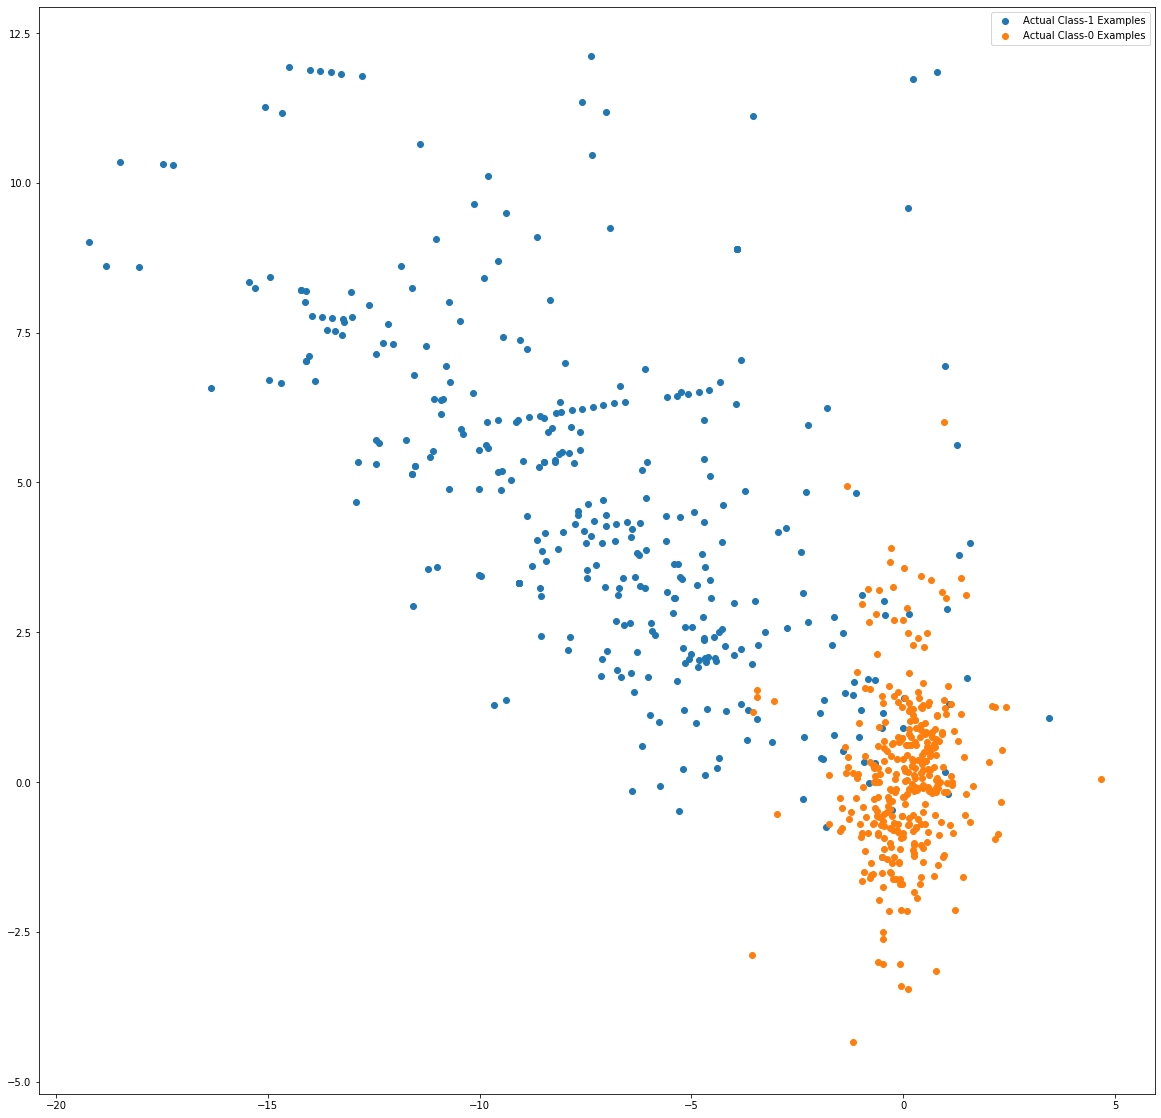

In [52]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.980


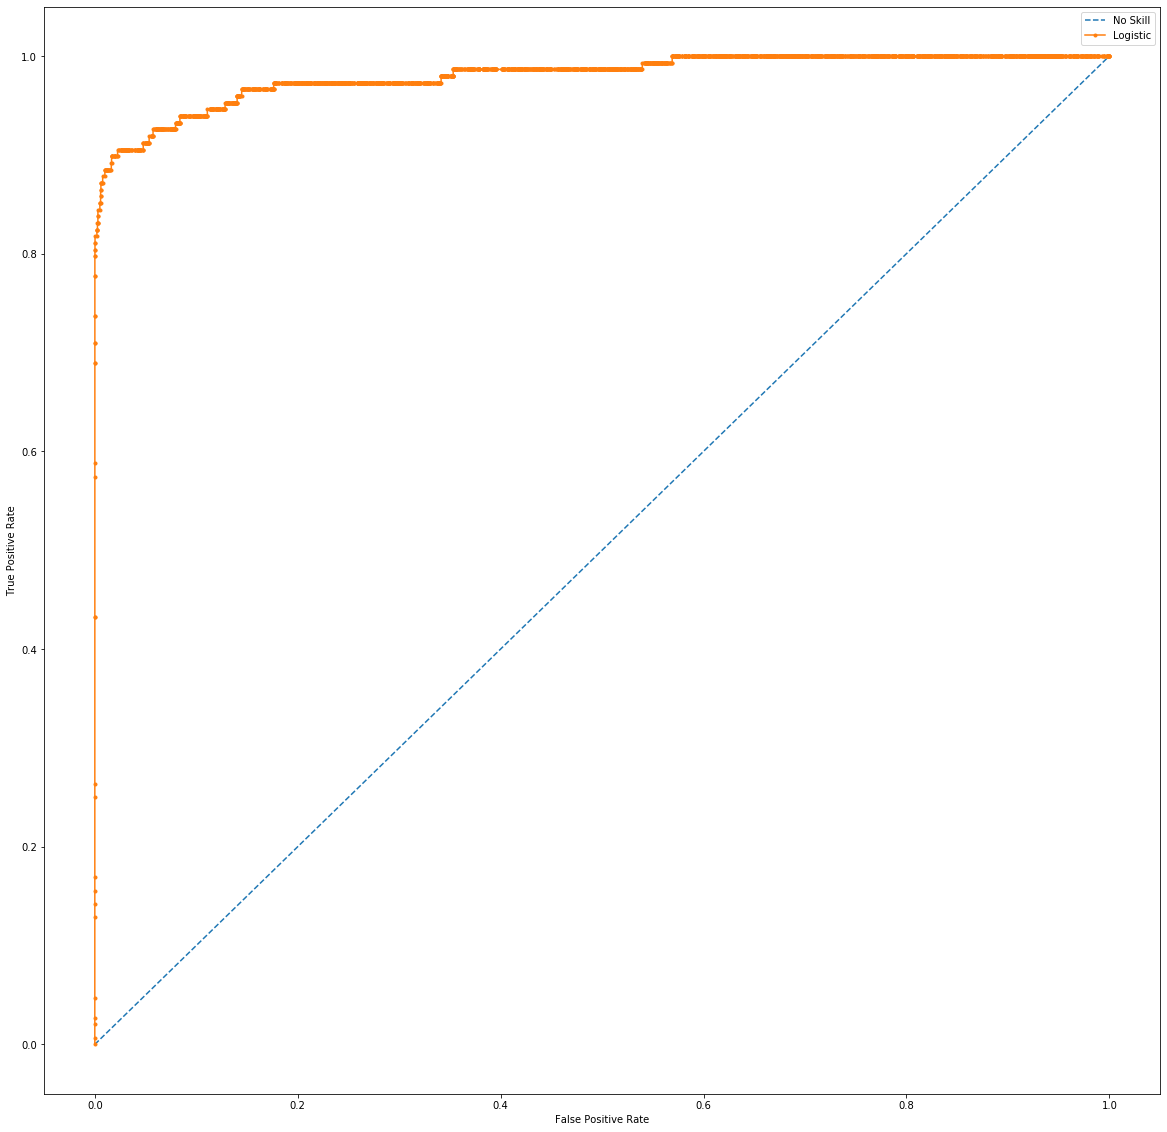

In [53]:
#### Print the FPR,TPR & select the best threshold from the roc curve

# roc curve and auc
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
prob = clf.predict_proba(X_test.values)[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
clf_auc = roc_auc_score(y_test, prob)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (clf_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
clf_fpr, clf_tpr, _ = roc_curve(y_test, prob)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(clf_fpr, clf_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [56]:
print('Train auc =', roc_auc_score(y_test, prob))
fpr, tpr, thresholds = roc_curve(y_test, prob)
threshold = thresholds[np.argmax(tpr-fpr)]
print('Threshold',threshold)

Train auc = 0.9801742125500845
Threshold 0.001743387


# END OF BOOK